In [14]:
%matplotlib inline

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs, make_moons, make_circles, \
    load_iris, make_regression, make_s_curve, make_swiss_roll

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples

In [104]:
matplotlib.rcParams['figure.figsize'] = (4, 4)

# Clustering Demos

## Comparison between algorithms, 2D

### Sample data

In [150]:
RANDOM_STATE = 1
RANDOM_STATE2 = 4

In [151]:
def plot_clusters(attributes, cluster_labels, title):
    plt.scatter(attributes[:,0], attributes[:,1], c = cluster_labels)
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.show()

In [152]:
blobs, blob_clusters = make_blobs(random_state=RANDOM_STATE)
blobs2, blob_clusters2 = make_blobs(random_state=RANDOM_STATE2)

moons, moon_clusters = make_moons(noise=0.05, random_state=RANDOM_STATE)

circles, circle_clusters = make_circles(factor=0.5, random_state=RANDOM_STATE)

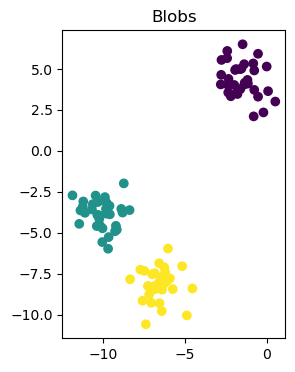

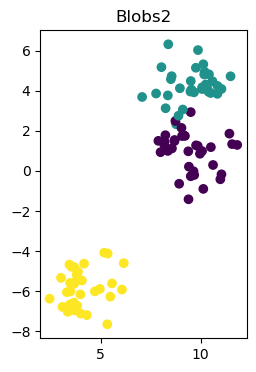

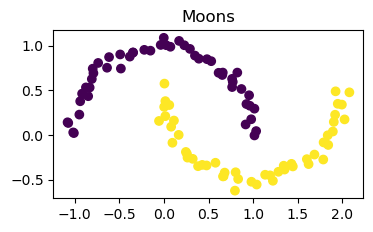

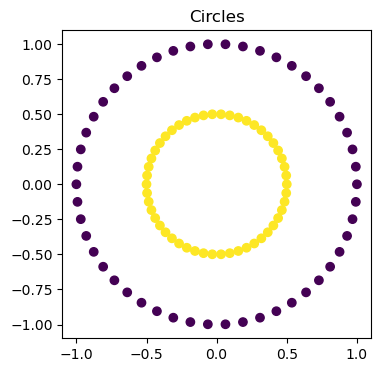

In [153]:
plot_clusters(blobs, blob_clusters, 'Blobs')
plot_clusters(blobs2, blob_clusters2, 'Blobs2')

plot_clusters(moons, moon_clusters, 'Moons')

plot_clusters(circles, circle_clusters, 'Circles')

### DBSCAN

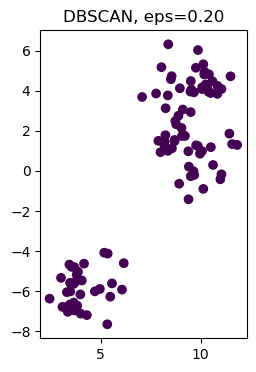

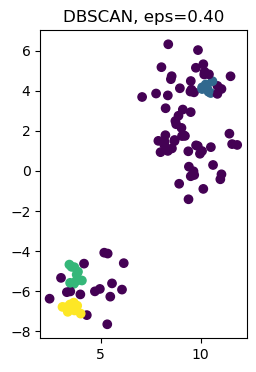

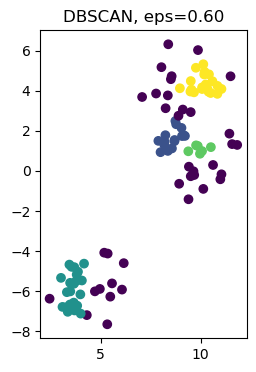

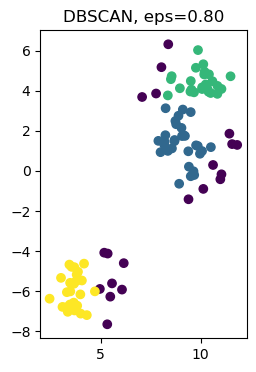

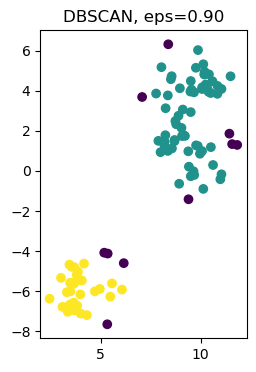

In [167]:
for eps in [0.2, 0.4, 0.6, 0.8, 0.9]:
    db = DBSCAN(eps = eps, min_samples=5, metric = "euclidean")
    predicted_labels = db.fit_predict(blobs2)
    plot_clusters(blobs2, predicted_labels, f"DBSCAN, eps={eps:.2f}")

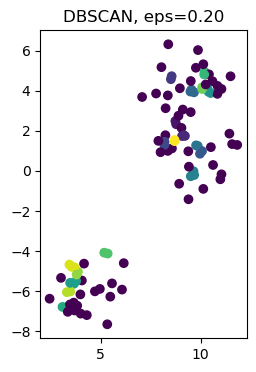

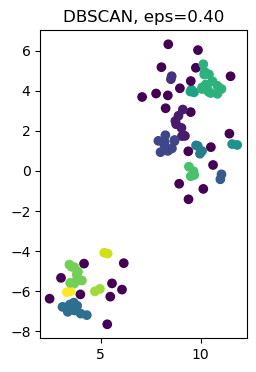

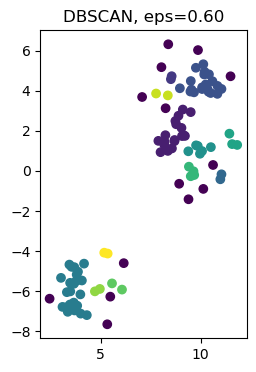

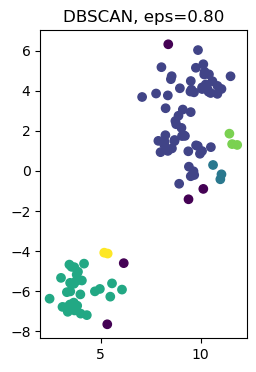

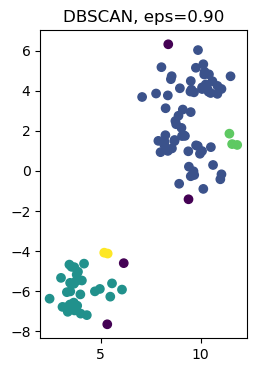

In [169]:
for eps in [0.2, 0.4, 0.6, 0.8, 0.9]:
    db = DBSCAN(eps = eps, min_samples=2, metric = "euclidean")
    predicted_labels = db.fit_predict(blobs2)
    plot_clusters(blobs2, predicted_labels, f"DBSCAN, eps={eps:.2f}")

## Samples generators

### Types

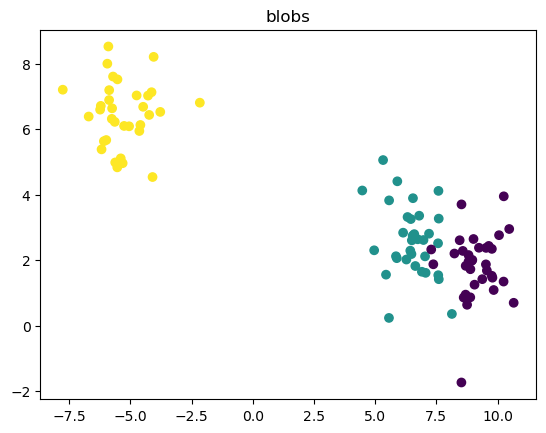

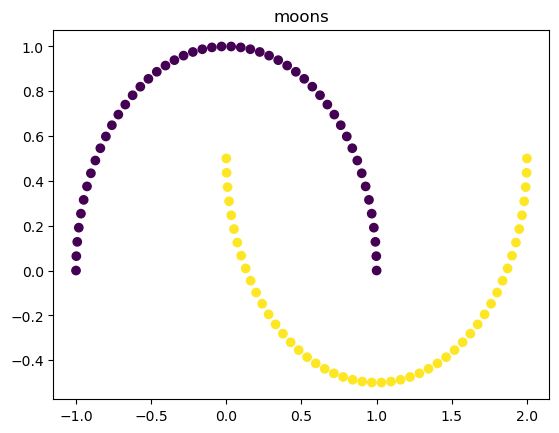

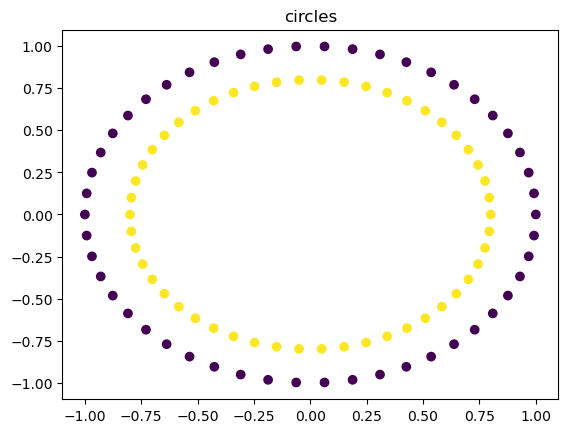

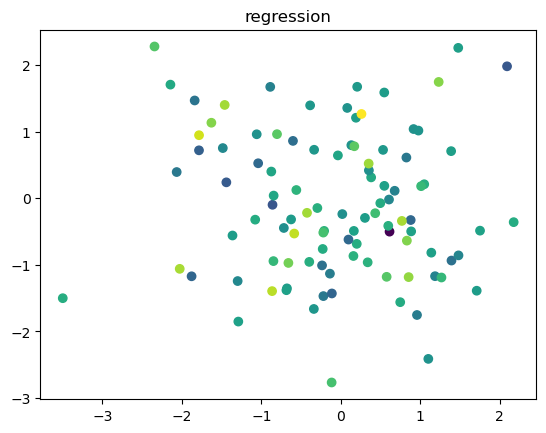

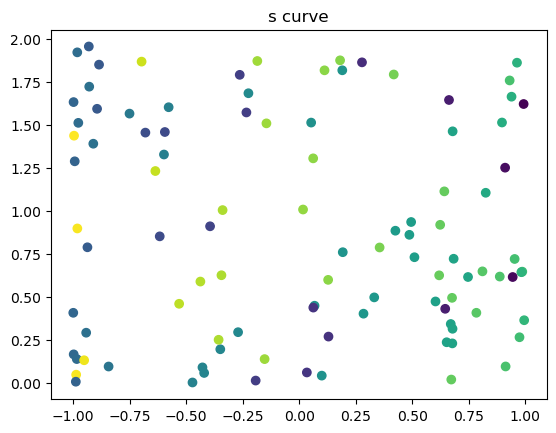

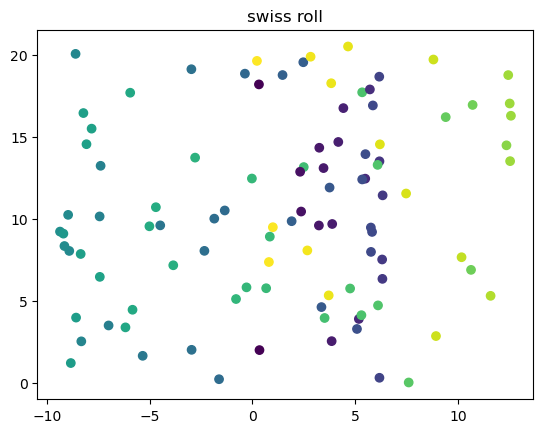

In [78]:
generators = [make_blobs, make_moons, make_circles, make_regression, make_s_curve, make_swiss_roll]
titles = ['blobs', 'moons', 'circles', 'regression', 's curve', 'swiss roll']

for g, t in zip(generators, titles):
    data, labels = g()
    x, y = data[:, 0], data[:, 1]
    plt.scatter(x, y, c = labels)
    plt.title(t)
    plt.show()

### Blobs

Generate isotropic Gaussian blobs for clustering.

#### Example

In [71]:
data, labels = make_blobs(n_samples=200, n_features=2, centers=4)

In [16]:
x = data[:, 0]
y = data[:, 1]

In [17]:
def plot_clusters(x, y, labels):
    plt.scatter(x, y, c = labels)
    plt.show()

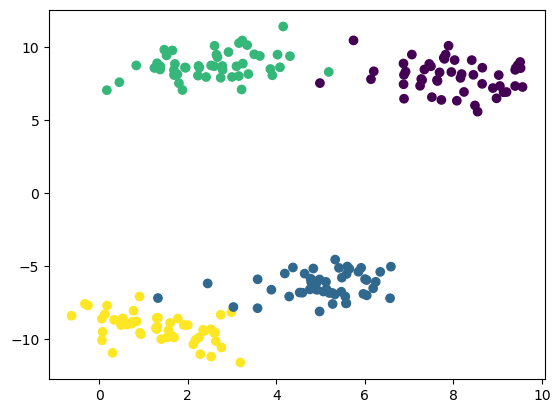

In [19]:
plot_clusters(x, y, labels)

#### Example

In [20]:
attributes, clusters = make_blobs()

In [21]:
def plot_kmeans(attributes, clusters):
    plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
    plt.show()

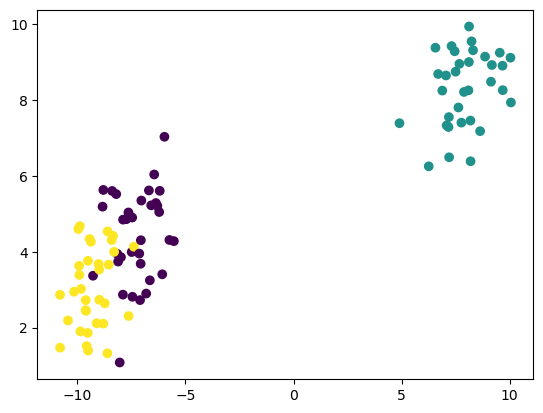

In [22]:
plot_kmeans(attributes, clusters)

In [23]:
k_means = KMeans(n_clusters = 3, init = "random")

In [24]:
k_means.fit(attributes)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [25]:
k_means.predict(attributes)

array([1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1])

In [26]:
clusters

array([0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2])

Безсмислено е сравнение с accuracy score.

In [27]:
predictions = k_means.predict(attributes)

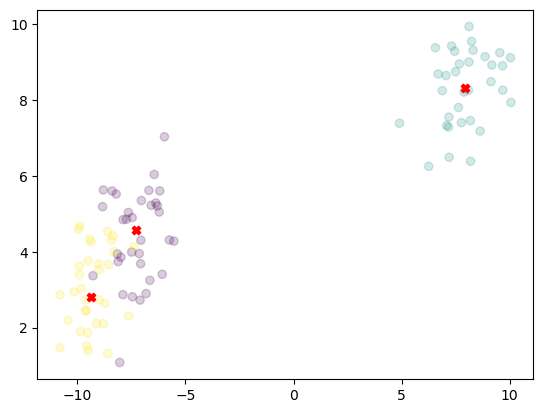

In [41]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters, marker='o', alpha=0.2)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='X', c='red')

Разменени са цветовете.

In [26]:
attributes_mixed, clusters_mixed = make_blobs(centers=[(1,1), (2,3), (-1, 2)], cluster_std=0.5)

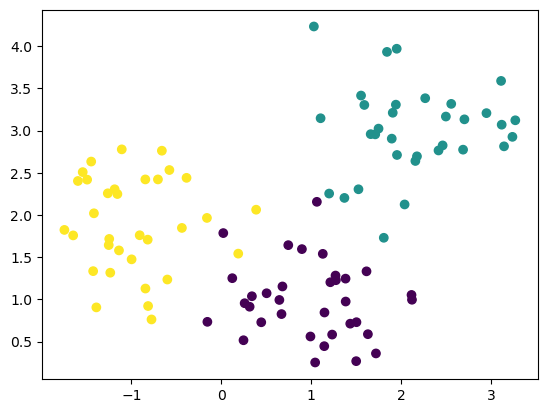

In [27]:
plot_kmeans(attributes_mixed, clusters_mixed)

### Moons

In [31]:
moons_x, moons_c = make_moons(noise = 0.05)

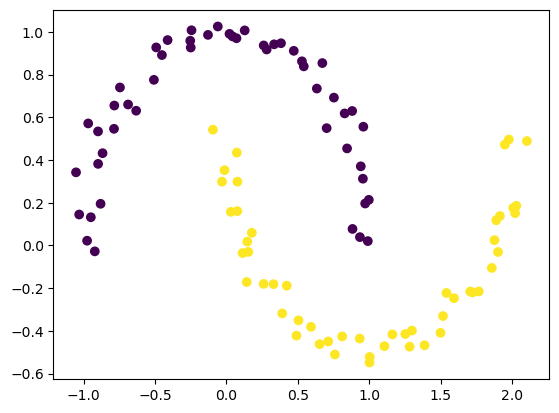

In [34]:
plot_kmeans(moons_x, moons_c)

In [35]:
k_means_moons = KMeans(n_clusters=2)
k_means_moons.fit(moons_x)
moons_predictions = k_means_moons.predict(moons_x)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


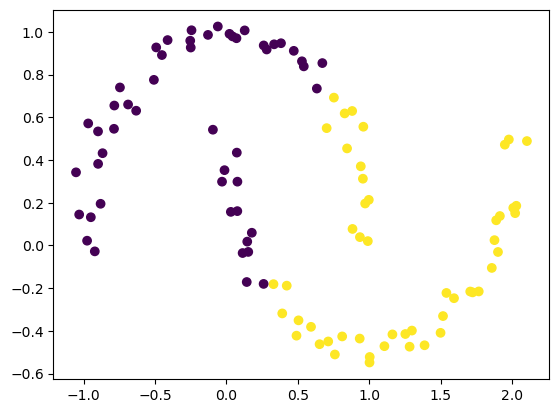

In [37]:
plot_kmeans(moons_x, moons_predictions)

### Circles

In [39]:
circle_attrs, circle_clusters = make_circles(factor=0.5)

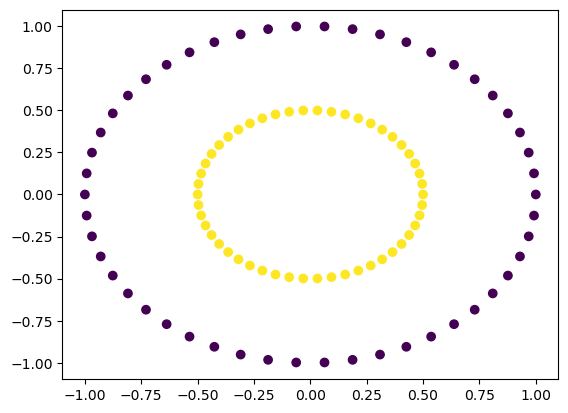

In [41]:
plot_kmeans(circle_attrs, circle_clusters)

In [43]:
k_means_circles = KMeans(n_clusters=2)
k_means_circles.fit(circle_attrs)
circles_predictions = k_means_circles.predict(circle_attrs)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


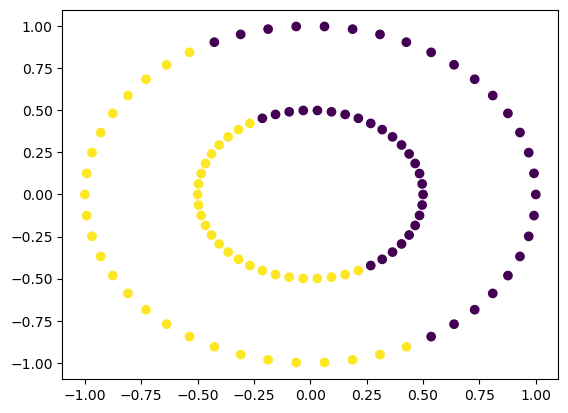

In [44]:
plot_kmeans(circle_attrs, circles_predictions)

In [45]:
k_means_circles = KMeans(n_clusters=2)
k_means_circles.fit(circle_attrs)
circles_predictions = k_means_circles.predict(circle_attrs)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


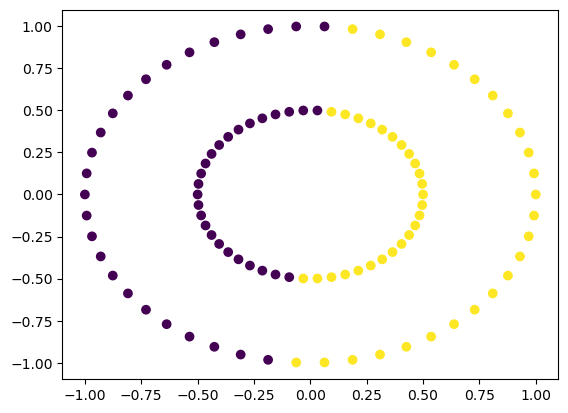

In [46]:
plot_kmeans(circle_attrs, circles_predictions)

Всеки път линията която разделя групите е различна - случайна е

## Agglomerative clustering

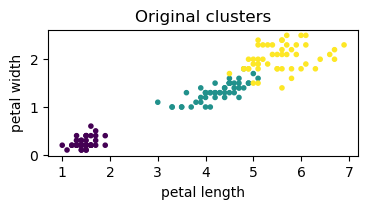

In [111]:
attributes = load_iris().data[:,[2,3]]
labels = load_iris().target
x, y = attributes[:, 0], attributes[:, 1]

def plot_aggl_clusters(labels, title):
    plt.scatter(x, y, c=labels, marker='.')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.show()
    
plot_aggl_clusters(labels, 'Original clusters')

In [115]:
aggl = AgglomerativeClustering(n_clusters=3)

In [109]:
aggl.fit(attributes)

AgglomerativeClustering(n_clusters=3)

In [ ]:
# Няма Predict метод  
# aggl.predict()

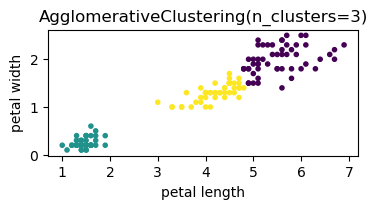

In [116]:
labels = aggl.fit_predict(attributes)
plot_aggl_clusters(labels, 'AgglomerativeClustering(n_clusters=3)')

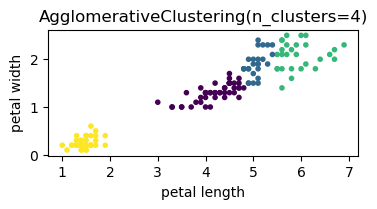

In [117]:
aggl = AgglomerativeClustering(n_clusters=4)
labels = aggl.fit_predict(attributes)
plot_aggl_clusters(labels, 'AgglomerativeClustering(n_clusters=4)')

## Hierarchical clustering

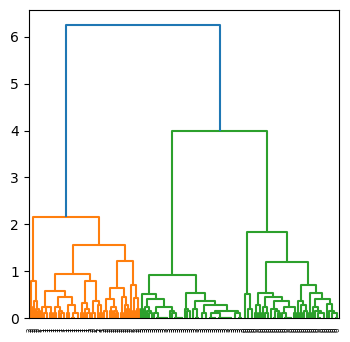

In [119]:
from scipy.cluster.hierarchy import linkage, dendrogram

row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
dendrogram(row_clusters, labels = labels)
plt.show()

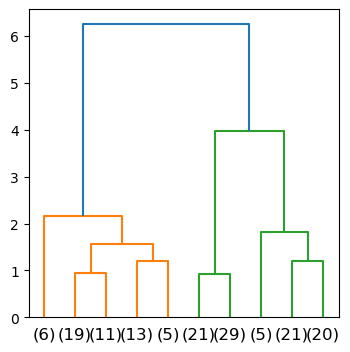

In [121]:
# Show only the last 10 merged clusters
dendrogram(row_clusters, labels=labels, truncate_mode="lastp", p=10)
plt.show()

## Iris dataset

In [49]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

In [52]:
iris_data.shape, iris_target.shape

((150, 4), (150,))

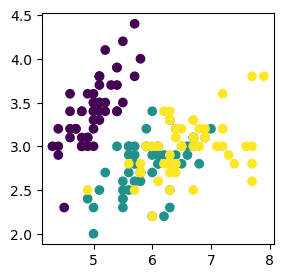

In [96]:
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_target)

### Model petals attributes

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
petals = iris_data[:, 2:4]

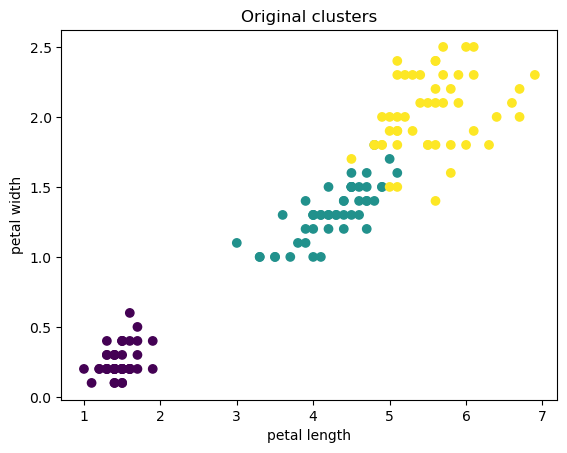

In [63]:
plt.scatter(petals[:, 0], petals[:, 1], c=iris_target)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Original clusters')
plt.show()

#### Kmeans random

In [65]:
km = KMeans(n_clusters=3, init='random')
km.fit(petals)
predicted_petals = km.predict(petals)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


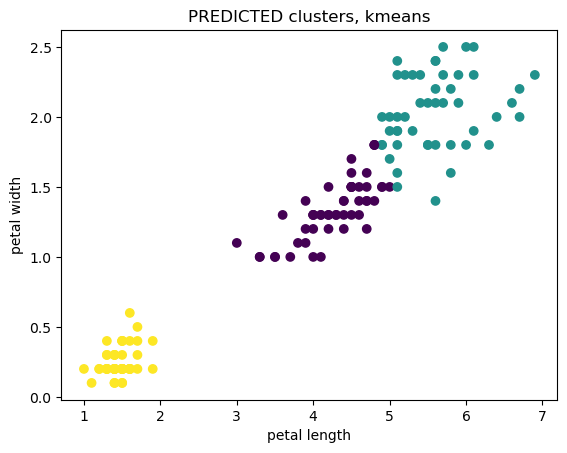

In [68]:
plt.scatter(petals[:, 0], petals[:, 1], c=predicted_petals)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('PREDICTED clusters, kmeans')
plt.show()

#### KMeans++

In [69]:
km = KMeans(n_clusters=3, init='k-means++')

km = KMeans(n_clusters=3, init='random')
km.fit(petals)
predicted_petals = km.predict(petals)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


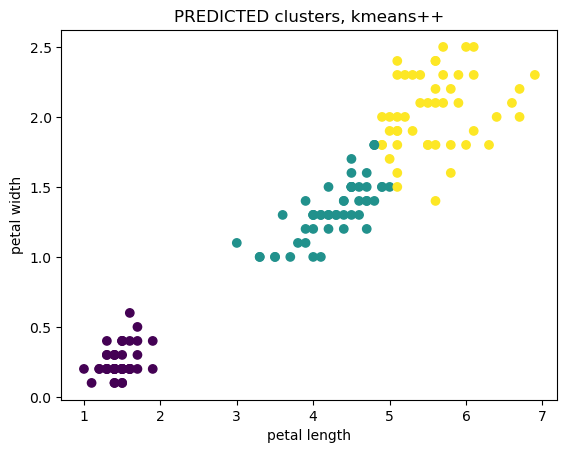

In [70]:
plt.scatter(petals[:, 0], petals[:, 1], c=predicted_petals)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('PREDICTED clusters, kmeans++')
plt.show()

Резултатите на Kmean и Kmeans++ изглеждат подобни.

#### Silhouette analysis

In [87]:
silhouette_samples(petals, predicted_petals)

array([ 0.9439618 ,  0.9439618 ,  0.93011824,  0.94214886,  0.9439618 ,
        0.88066168,  0.93785725,  0.94214886,  0.9439618 ,  0.92661146,
        0.94214886,  0.92516206,  0.92851187,  0.8788443 ,  0.9086596 ,
        0.91843229,  0.90897718,  0.93785725,  0.89422954,  0.93587748,
        0.89632917,  0.91843229,  0.8603497 ,  0.8578721 ,  0.82248312,
        0.92516206,  0.90460358,  0.94214886,  0.9439618 ,  0.92516206,
        0.92516206,  0.91843229,  0.92661146,  0.9439618 ,  0.94214886,
        0.9086596 ,  0.93011824,  0.92851187,  0.93011824,  0.94214886,
        0.92566141,  0.92566141,  0.93011824,  0.84878723,  0.808802  ,
        0.93785725,  0.92516206,  0.9439618 ,  0.94214886,  0.9439618 ,
        0.52883871,  0.63363614,  0.25988254,  0.71632337,  0.57489433,
        0.66066728,  0.4371519 ,  0.46337928,  0.609556  ,  0.68599702,
        0.58553654,  0.68574583,  0.68435472,  0.52883871,  0.63747271,
        0.68919162,  0.63363614,  0.68489362,  0.63363614,  0.69

## TODO: kMeans implementation

In [84]:
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [ ]:
class CustomKmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
    
    def fit(self, X):
        pass
    
    def _get_value_ranges(X):
        return (
            (X[0].min(), X[0].max()),
            (X[1].min(), X[1].max()),
        )
        